## Assignment 4.1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle


### Task A

In [5]:
mean1 = [0,0]
covariance = [[1,0],[0,1]]
mean2 = [5,0]

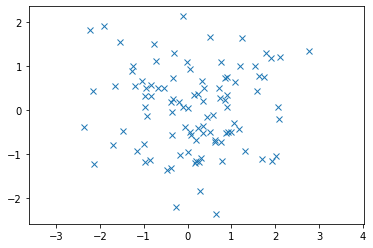

In [6]:
x1 = np.random.default_rng().multivariate_normal(mean1, covariance, 100).T
plt.plot(x1[0], x1[1], 'x')
plt.axis('equal')
plt.show()

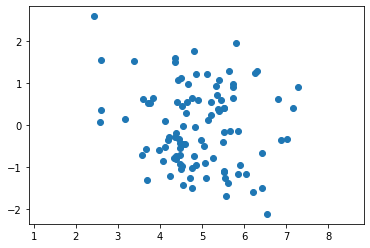

In [7]:
x2= np.random.default_rng().multivariate_normal(mean2, covariance, 100).T
plt.plot(x2[0], x2[1], 'o')
plt.axis('equal')
plt.show()

In [8]:
data_temp = pd.DataFrame(columns = ["x1","x2","label"])
data_taska = pd.DataFrame(columns = ["x1","x2","label"])


In [9]:
data_temp["x1"] = x1[0] 
data_temp["x2"] = x1[1] 
data_temp["label"] = 0


data_taska["x1"] = x2[0]
data_taska["x2"] = x2[1]
data_taska["label"] = 1



data_taska = data_taska.append(data_temp, ignore_index=True)

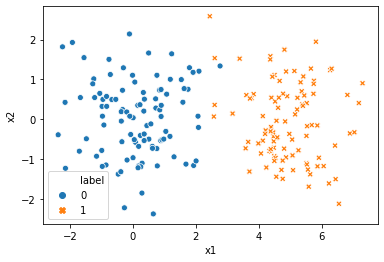

In [10]:
sns.scatterplot(x="x1", y="x2", hue="label", style = "label",
                     data=data_taska)

### Task B

In [11]:
mean3 = [2.25,0]

x3 = np.random.default_rng().multivariate_normal(mean3, covariance, 100).T

data_taskb = pd.DataFrame(columns = ["x1","x2","label"])

data_taskb["x1"] = x3[0]
data_taskb["x2"] = x3[1]
data_taskb["label"] = 1


data_taskb = data_taskb.append(data_temp, ignore_index=True)

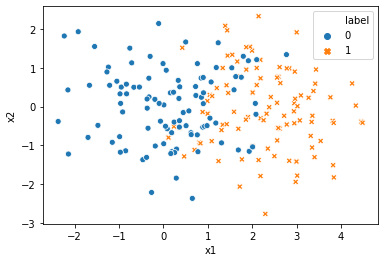

In [12]:
sns.scatterplot(x="x1", y="x2", hue="label", style = "label",
                     data=data_taskb)

### Task C

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib.colors import ListedColormap


In [14]:
### Randomising the data.. ie shuffling the data


data_taska = shuffle(data_taska)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_taska.iloc[:,0:2], data_taska.iloc[:,-1:], test_size=0.33, shuffle=True,random_state=4)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 2)
(66, 2)
(134, 1)
(66, 1)


In [16]:
model_lg1 = LogisticRegression(penalty="l2",random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
train_score = metrics.accuracy_score(y_train, model_lg1.predict(X_train))
print("Train accuracy:   %0.5f" % train_score)

Train accuracy:   0.98507


In [18]:
pred = model_lg1.predict(X_test)
    
score = metrics.accuracy_score(y_test, pred)
print("Test accuracy:   %0.5f" % score)

print("classification report:")
print(metrics.classification_report(y_test, pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))

Test accuracy:   1.00000
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

confusion matrix:
[[34  0]
 [ 0 32]]


In [19]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(data_taska.iloc[:,0:2], data_taska.iloc[:,-1:], test_size=0.33, stratify= data_taska["label"],random_state=4)



print(X_train_st.shape)
print(X_test_st.shape)
print(y_train_st.shape)
print(y_test_st.shape)

(134, 2)
(66, 2)
(134, 1)
(66, 1)


In [20]:
pd.value_counts(y_train_st.values.flatten())


1    67
0    67
dtype: int64

In [21]:
model_lg2 = LogisticRegression(penalty="l2",random_state=42).fit(X_train_st, y_train_st)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
train_score2 = metrics.accuracy_score(y_train_st, model_lg2.predict(X_train_st))
print("Train accuracy:   %0.5f" % train_score2)

Train accuracy:   0.97761


In [23]:
pred2 = model_lg2.predict(X_test_st)
    
score2 = metrics.accuracy_score(y_test_st, pred2)
print("Test accuracy:   %0.5f" % score2)

print("classification report:")
print(metrics.classification_report(y_test_st, pred2))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test_st, pred2))

Test accuracy:   0.96970
classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.94      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66

confusion matrix:
[[33  0]
 [ 2 31]]


In [24]:
model_lg2.coef_

array([[ 2.44112631, -0.1415692 ]])

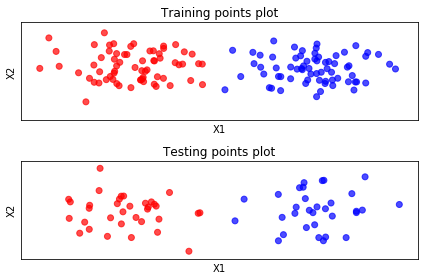

In [24]:
h = 0.02
x_min, x_max = data_taska.iloc[:, 0].min() - .5, data_taska.iloc[:, 0].max() + .5
y_min, y_max = data_taska.iloc[:, 1].min() - .5, data_taska.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure()
ax = plt.subplot(2, 1, 1)
#plt.subplot(2, 1, 1)
# Plot the training points
#sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, style = y_train)
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.to_numpy().ravel(), cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Training points plot')

# and testing points
ax = plt.subplot(2, 1, 2)
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.to_numpy().ravel(), cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Testing points plot')




plt.tight_layout()

### Plot data with decision boundary normal sampling

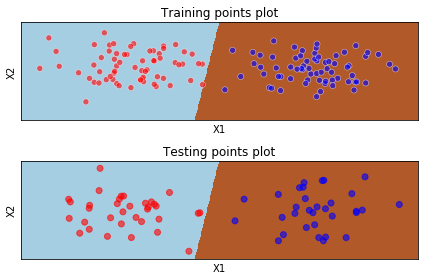

In [25]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
"""
if hasattr(model_lg1, "decision_function"):
    Z = model_lg1.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = model_lg1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
"""

Z = model_lg1.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
    
fig = plt.figure()
ax = plt.subplot(2, 1, 1)
# Put the result into a color plot
#ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.to_numpy().ravel(), cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Training points plot')

# and testing points
ax = plt.subplot(2, 1, 2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.to_numpy().ravel(), cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Testing points plot')


#ax.set_title("Logistic Regression")
#ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#        size=15, horizontalalignment='right')


plt.tight_layout()

### Plot data with decision boundary stratified sampling

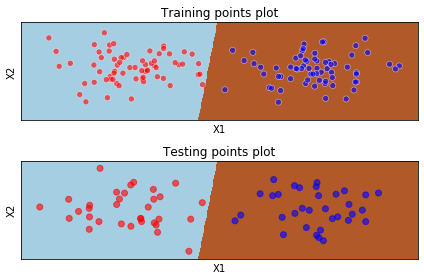

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
"""
if hasattr(model_lg1, "decision_function"):
    Z = model_lg1.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = model_lg1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
"""

Z = model_lg2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
    
fig = plt.figure()
ax = plt.subplot(2, 1, 1)
# Put the result into a color plot
#ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax.scatter(X_train_st.iloc[:, 0], X_train_st.iloc[:, 1], c=y_train_st.to_numpy().ravel(), cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Training points plot')

# and testing points
ax = plt.subplot(2, 1, 2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax.scatter(X_test_st.iloc[:, 0], X_test_st.iloc[:, 1], c=y_test_st.to_numpy().ravel(), cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Testing points plot')


#ax.set_title("Logistic Regression")
#ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#        size=15, horizontalalignment='right')


plt.tight_layout()

## Task F --- data_taskb

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from mlxtend.evaluate import bias_variance_decomp



In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_taskb.iloc[:,0:2], data_taskb.iloc[:,-1:], test_size=0.33, shuffle=True,random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 2)
(66, 2)
(134, 1)
(66, 1)


In [28]:
model_dt = DecisionTreeClassifier(random_state=4).fit(X_train, y_train)

In [29]:
train_score3 = metrics.accuracy_score(y_train, model_dt.predict(X_train))
print("Train accuracy:   %0.5f" % train_score3)

Train accuracy:   1.00000


In [30]:
pred3 = model_dt.predict(X_test)
    
score3 = metrics.accuracy_score(y_test, pred3)
print("Test accuracy:   %0.5f" % score3)

print("classification report:")
print(metrics.classification_report(y_test, pred3))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred3))

Test accuracy:   0.81818
classification report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.85      0.74      0.79        31

    accuracy                           0.82        66
   macro avg       0.82      0.81      0.82        66
weighted avg       0.82      0.82      0.82        66

confusion matrix:
[[31  4]
 [ 8 23]]


In [31]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(data_taskb.iloc[:,0:2], data_taskb.iloc[:,-1:], test_size=0.33,shuffle=True, stratify= data_taskb["label"],random_state=123)



print(X_train_st.shape)
print(X_test_st.shape)
print(y_train_st.shape)
print(y_test_st.shape)

(134, 2)
(66, 2)
(134, 1)
(66, 1)


###  Bias variance on DT classifier

In [32]:
tree = DecisionTreeClassifier(random_state=123)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train_st.to_numpy(), y_train_st.to_numpy(), X_test_st.to_numpy(), y_test_st.to_numpy(), 
        loss='0-1_loss',random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.500
Average bias: 33.000
Average variance: 0.133


### Bias Variance on Bagging

In [33]:
tree2 = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=tree2,
                        n_estimators=100,
                        random_state=123)

avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
        bag, X_train_st.to_numpy(), y_train_st.to_numpy(), X_test_st.to_numpy(), y_test_st.to_numpy(), 
        loss='0-1_loss',random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss2)
print('Average bias: %.3f' % avg_bias2)
print('Average variance: %.3f' % avg_var2)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Average expected loss: 0.500
Average bias: 33.000
Average variance: 0.104
